***1.Вопросы:***

1) 3

2) 4

***2. Задачи на логику:***

1) Остаток: $$40*0.5*0.2 = 4$$

2) Затраты одной кампании в час: $${120\over 24*6*5} = 0.16(6)$$ Искомое количество дней: $${216\over 0.16(6)*9*8} = 18$$

3) Было ипсользовано 120 рекламных баннеров. В кампании №1 использовано - 60, в кампании №2 - 45, в обеих кампаниях - 15.

4) У Кейт и Джона предпочтения совпадают.

|          | Instagram | Facebook | YouTube |
|----------|-----------|----------|---------|
| Энн      | +         | -        | (+)     |
| **Джон** | **(-)**   | **+**    | **+**   |
| **Кейт** | **-**     | **(+)**  | **+**   |
| Том      | (+)       | +        | -       |

5) Необходимый балл за модуль №5: $$80 = {4*78 + x\over 5}$$ $$x = 88$$ 

6) Время в минутах на дорогу туда: $${260\over 80}*60 = 195$$ Время в минутах на дорогу обратно: $${260\over 100}*60 = 156$$ Обратный путь быстрее на 39 минут.

***3.Техническое задание***

**Вопросы:**

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_excel("data.xlsx")

1) Выручка за июль

In [3]:
july = df._slice(slice(df.loc[(df['status'] =='Июль 2021')].iloc[0].name, df.loc[(df['status'] =='Август 2021')].iloc[0].name))
total = july.loc[july['status'] == 'ОПЛАЧЕНО', 'sum'].sum().round(2)
print(f'Выручка за июль: {total}')

Выручка за июль: 859896.47


2) Динамика выручки за период май-октябрь

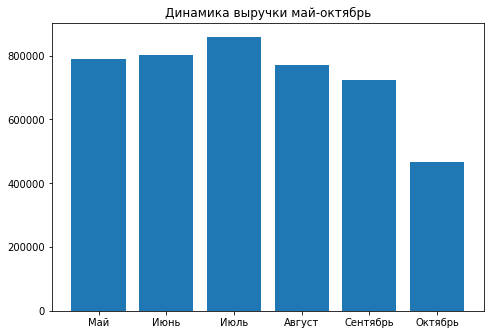

In [4]:
may = df._slice(slice(df.loc[(df['status'] =='Май 2021')].iloc[0].name, df.loc[(df['status'] =='Июнь 2021')].iloc[0].name))
total_may = may.loc[may['status'] == 'ОПЛАЧЕНО', 'sum'].sum().round(2)

june = df._slice(slice(df.loc[(df['status'] =='Июнь 2021')].iloc[0].name, df.loc[(df['status'] =='Июль 2021')].iloc[0].name))
total_june = june.loc[june['status'] == 'ОПЛАЧЕНО', 'sum'].sum().round(2)

july = df._slice(slice(df.loc[(df['status'] =='Июль 2021')].iloc[0].name, df.loc[(df['status'] =='Август 2021')].iloc[0].name))
total_july = july.loc[july['status'] == 'ОПЛАЧЕНО', 'sum'].sum().round(2)

august = df._slice(slice(df.loc[(df['status'] =='Август 2021')].iloc[0].name, df.loc[(df['status'] =='Сентябрь 2021')].iloc[0].name))
total_august = august.loc[august['status'] == 'ОПЛАЧЕНО', 'sum'].sum().round(2)

september = df._slice(slice(df.loc[(df['status'] =='Сентябрь 2021')].iloc[0].name, df.loc[(df['status'] =='Октябрь 2021')].iloc[0].name))
total_september = september.loc[september['status'] == 'ОПЛАЧЕНО', 'sum'].sum().round(2)

october = df.iloc[df.loc[(df['status'] =='Октябрь 2021')].iloc[0].name:]
total_october = october.loc[october['status'] == 'ОПЛАЧЕНО', 'sum'].sum().round(2)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
months = ['Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь']
proceeds = [total_may, total_june, total_july, total_august, total_september, total_october]
ax.bar(months, proceeds)
ax.set_title('Динамика выручки май-октябрь')
plt.show()

3) Менеджер, привлекший большую выручку за сентябрь 2021

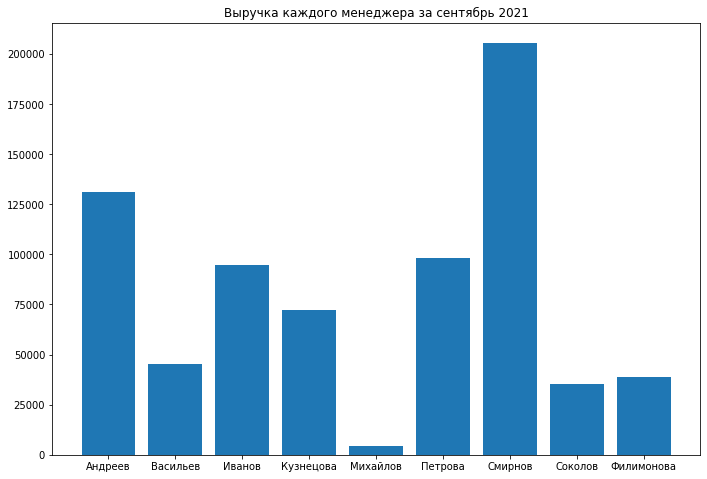

Менеджер, привлекший большую выручку за сентябрь 2021: Смирнов


In [5]:
sale = september.loc[september['status'] == 'ОПЛАЧЕНО'].groupby('sale')['sum'].sum()
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(sale.index, sale.values)
ax.set_title('Выручка каждого менеджера за сентябрь 2021')
plt.show()
print(f'Менеджер, привлекший большую выручку за сентябрь 2021: {sale.idxmax()}')

4) Тип сделок преобладающий в октябре 2021

In [6]:
print('Количество сделок в октябре 2021')
october['new/current'].value_counts()

Количество сделок в октябре 2021


текущая    99
новая      36
Name: new/current, dtype: int64

In [7]:
print('Тип сделки, преобладающий в октябре 2021')
october['new/current'].value_counts().idxmax()

Тип сделки, преобладающий в октябре 2021


'текущая'

5) Количество оригиналов договора по майским сделкам полученных в июне 2021

In [8]:
amount = ((may['receiving_date'].iloc[2:] > datetime.strptime('2021/06/01', '%Y/%m/%d')) & (may['receiving_date'].iloc[2:] < datetime.strptime('2021/06/30', '%Y/%m/%d'))).value_counts()
print(f'Количество оригиналов договора по майским сделкам полученных в июне 2021: {amount.loc[True]}')

Количество оригиналов договора по майским сделкам полученных в июне 2021: 76


**Задание:**

In [9]:
# Остаток перенесенных бонусов, при условии статуса сделки - новая (месяц - май)
mask_may = ((may.iloc[2:]['receiving_date'] > datetime.strptime('2021/07/01', '%Y/%m/%d')) & (may.iloc[2:]['receiving_date'] < datetime.strptime('2021/07/31', '%Y/%m/%d')) & (may.iloc[2:]['status'] != 'ПРОСРОЧЕНО'))
may_filtered = may.iloc[2:].loc[mask_may]
may_filtered.loc[may_filtered['new/current'] == 'текущая', 'sum'] = 0
new_may = may_filtered.groupby('sale')[['sum']].sum()*0.07

# Остаток перенесенных бонусов, при условии статуса сделки - текущая  (месяц - май)
# Начисляемый процент бонусов для суммы меньше 10к
mask = ((may.iloc[2:]['receiving_date'] > datetime.strptime('2021/07/01', '%Y/%m/%d')) & (may.iloc[2:]['receiving_date'] < datetime.strptime('2021/07/31', '%Y/%m/%d')) & (may.iloc[2:]['status'] != 'ПРОСРОЧЕНО') & (may.iloc[2:]['new/current'] == 'текущая'))
less = may.iloc[2:].loc[mask]
less.loc[less['sum'] > 10000, 'sum'] = 0
old_less_10k_may = less.groupby('sale')[['sum']].sum()*0.03

# Начисляемый процент бонусов для суммы больше 10к
more = may.iloc[2:].loc[mask]
more.loc[more['sum'] < 10000, 'sum'] = 0
old_more_10k_may = more.groupby('sale')[['sum']].sum()*0.05

# Полученный остаток бонусов в мае
old_more_10k_may + old_less_10k_may + new_may

,sum
sale,
Андреев,498.1290
Васильев,104.3730
Иванов,1478.4180
Кузнецова,961.0551
Петрова,1116.5630
Селиванов,1930.3080
Смирнов,1272.5290
Филимонова,588.6825


In [10]:
# Остаток перенесенных бонусов, при условии статуса сделки - новая (месяц - июнь)
mask_june = ((june.iloc[1:]['receiving_date'] > datetime.strptime('2021/07/01', '%Y/%m/%d')) & (june.iloc[1:]['receiving_date'] < datetime.strptime('2021/07/31', '%Y/%m/%d')) & (june.iloc[1:]['status'] != 'ПРОСРОЧЕНО'))
june_filtered = june.iloc[1:].loc[mask_june]
june_filtered.loc[june_filtered['new/current'] == 'текущая', 'sum'] = 0
new_june = june_filtered.groupby('sale')[['sum']].sum()*0.07

# Остаток перенесенных бонусов, при условии статуса сделки - текущая  (месяц - июнь)
# Начисляемый процент бонусов для суммы меньше 10к
mask_june_1 = ((june.iloc[1:]['receiving_date'] > datetime.strptime('2021/07/01', '%Y/%m/%d')) & (june.iloc[1:]['receiving_date'] < datetime.strptime('2021/07/31', '%Y/%m/%d')) & (june.iloc[1:]['status'] != 'ПРОСРОЧЕНО') & (june.iloc[1:]['new/current'] == 'текущая'))
less = june.iloc[1:].loc[mask_june_1]
less.loc[less['sum'] > 10000, 'sum'] = 0
old_less_10k_june = less.groupby('sale')[['sum']].sum()*0.03

# Начисляемый процент бонусов для суммы больше 10к
more = june.iloc[1:].loc[mask_june_1]
more.loc[more['sum'] < 10000, 'sum'] = 0
old_more_10k_june = more.groupby('sale')[['sum']].sum()*0.05

# Полученный остаток бонусов в июне
old_more_10k_june + old_less_10k_june + new_june

,sum
sale,
Андреев,3103.4117
Васильев,375.4830
Иванов,2389.3850
Кузнецова,2297.8785
Петрова,4391.3154
Селиванов,3367.3820
Смирнов,5109.1430
Филимонова,518.3810


In [11]:
print('Остаток бонусов каждого из менеджеров на рассматриваемый месяц - июль')
old_more_10k_may + old_less_10k_may + new_may + old_more_10k_june + old_less_10k_june + new_june

Остаток бонусов каждого из менеджеров на рассматриваемый месяц - июль


,sum
sale,
Андреев,3601.5407
Васильев,479.8560
Иванов,3867.8030
Кузнецова,3258.9336
Петрова,5507.8784
Селиванов,5297.6900
Смирнов,6381.6720
Филимонова,1107.0635
